# Gradient Descent with Classification:

## This notebook will take a quick review on logistic Regrsseion and Batch Gradient Descent(using python):

### 1- Batch Gradient Descent from scratch and using it to Binary classification
### 2- Use bult-in function from sklearn logistic Regrsseion to Binary classification

### Import numpy, matplotlib.pyplot, and sklearn

In [1]:
#import numpy and name it np as always
import numpy as np

#import only needed method and classes from sklearn
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import MinMaxScaler

#import matplotlib for visualization
import matplotlib.pyplot as plt

#### Import the data and explore it 

In [2]:
#import the data with its labels
x_data,y_data = load_breast_cancer(return_X_y= True,as_frame=True)

#adding bais to be used in the case of calculating using Gradient Descent
x_GD = np.concatenate((np.ones(len(x_data)).reshape(-1,1),x_data),axis = 1)

#explore the data quickly using decribe mehtod to get statistical review
x_data.describe()

# x_GD[:,0]
# y_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [3]:
#split the data into train data and testing data
X_train, X_test, y_train, y_test = train_test_split(x_GD, y_data, test_size=0.15, shuffle= True)

In [4]:
#create scaler object to pre-processing the data
scaler =MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)

## Implement Gradient Descent to be used  in Logestic regression

In [5]:
#Implement Sigmoid Function to be used in logistic REgression
sigmoid = lambda z: 1 / (1 + np.e**(-z))

#Cost Function implementation
def Log_Reg_cost_fn(x,y,thetas):
    '''This function input :
                x : shape(m*n) numpy array m records , n features 
                y : shape(m*1) numpy array m records as labels
                thetas : contains theats valuse numpy array shape(n*1)
                
        Output :is cost/error fuction value'''
    
    z = x@thetas
    predict_1 = y * np.log10(sigmoid(z))
    predict_0 = (1 - y) * np.log10(1 - sigmoid(z))
    
    return -sum(predict_1 + predict_0) / len(x)

def Log_Reg_fit(x,y , epochs=1000, learning_rate=1e-3):
    '''This function input :
                x : shape(m*n) numpy array m records , n features 
                y : shape(m*1) numpy array m records as labels
                epochs : number of loops over the data set
                learning_rate : the ratio of updating thetas
           
           Output :
                loss_list : list contains cost/error fuction values                
                thetas : contains theats valuse numpy array shape(n*1)'''
    loss_list= []        
    thetas = np.random.rand(x.shape[1])
    N = len(x)
    
    for _ in range(epochs):        
        # Gradient Descent
        y_hat = sigmoid(x@ thetas)
        thetas -= learning_rate * (x.T @  (y_hat - y)) / N            
        # Saving Progress
        loss_list.append(Log_Reg_cost_fn(x, y, thetas)) 
            
    return (thetas, loss_list)

def Log_Reg_predict(x,thetas):
    '''This function input :
                x : shape(m*n) numpy array m records , n features
                thetas : contains theats valuse numpy array shape(n*1)
                        
           Output :
                z : shape(m*1) numpy array m records as labels after mapping the output into bainary values(1 or 0)              
                '''
    
    # Predicting with sigmoid function
    z = x@thetas
    # Returning binary result
    return [1 if i > 0.5 else 0 for i in sigmoid(z)]   


In [6]:
#calculate thetas and loss_values of training data
thetas, loss_list = Log_Reg_fit(X_train,y_train, epochs=5000, learning_rate=0.7)

In [24]:
#predict the values from test data
y_pred = Log_Reg_predict(X_test,thetas)

In [25]:
#prediction score
print(f'Accuracy score = {accuracy_score(y_test,y_pred)}')

Accuracy score = 0.9767441860465116


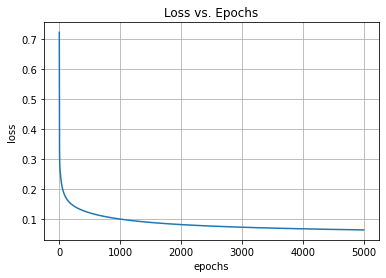

In [26]:
plt.plot(loss_list)
plt.grid()
plt.title('Loss vs. Epochs')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.show()

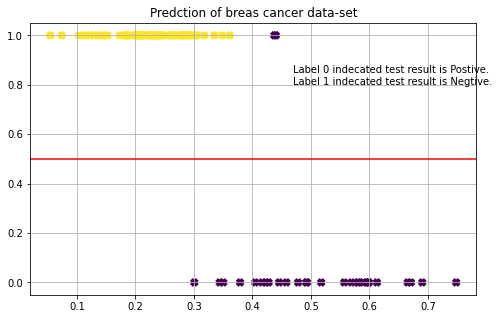

In [27]:
#plot classified data on one of the features
plt.figure(figsize=(8,5))

plt.scatter(X_test[:,3],y_pred, c = y_test, marker = 'x' , lw = 4)
plt.axhline(y = 0.5, c='r')
plt.title('Predction of breas cancer data-set')
plt.text(.47,.8,'Label 0 indecated test result is Postive.\nLabel 1 indecated test result is Negtive.',{'color':'black','size':10})


plt.grid()
plt.show()

### **for positive samples recall is around 90% it is good but needed to imporved but F-1 Score giving acceptable score for the whole test datset

In [10]:
cm =  confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
print('** 0 label indecats Postive Sample.\n   1 label indecats Negative Sample.')

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       0.97      1.00      0.98        57

    accuracy                           0.98        86
   macro avg       0.98      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86

** 0 label indecats Postive Sample.
   1 label indecats Negative Sample.


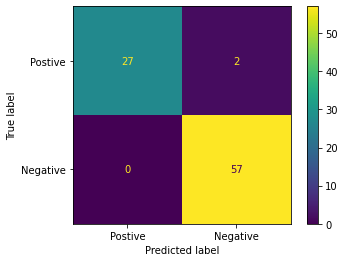

In [11]:
cmd_obj = ConfusionMatrixDisplay(cm,display_labels=['Postive','Negative'])
cmd_obj.plot()

# Using Logistic Regression from Sklearn

In [12]:
reg = LogisticRegression().fit(X_train, y_train)

#Prediction step
y_pred = reg.predict(X_test)
#report Acuurcy 
print(f'Accuracy score = {reg.score(X_test,y_test)}')

Accuracy score = 0.9883720930232558


### **for positive samples recall is 97% it is better than previous trail and F-1 Score giving acceptable score for the whole test datset 99%

In [13]:
cm =  confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
print('** 0 label indecats Postive Sample.\n   1 label indecats Negative Sample.')

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.98      1.00      0.99        57

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86

** 0 label indecats Postive Sample.
   1 label indecats Negative Sample.


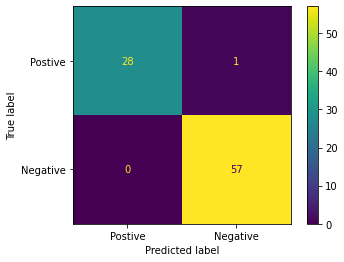

In [14]:
cmd_obj = ConfusionMatrixDisplay(cm,display_labels=['Postive','Negative'])
cmd_obj.plot()

# Using Logisitic Regression with class weights
## Class weight is = 'balanced'

In [15]:
reg_balanced = LogisticRegression(class_weight='balanced').fit(X_train, y_train)

y_pred = reg_balanced.predict(X_test)


### ** After using balanced to be balanced over the class weights
### for positive samples recall is 100% it is better than previous trail and F-1 Score giving acceptable score for the whole test datset 100%

In [16]:
cm =  confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
print('** 0 label indecats Postive Sample.\n   1 label indecats Negative Sample.')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        57

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86

** 0 label indecats Postive Sample.
   1 label indecats Negative Sample.


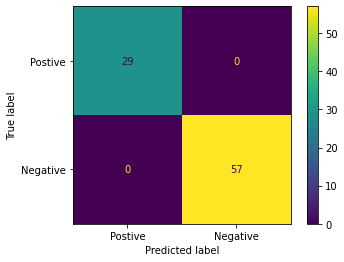

In [17]:
cmd_obj = ConfusionMatrixDisplay(cm,display_labels=['Postive','Negative'])
cmd_obj.plot()

## Class weight put in manually

In [18]:
reg_balanced = LogisticRegression(class_weight={0:2,1:1}).fit(X_train, y_train)

y_pred = reg_balanced.predict(X_test)

In [19]:
cm =  confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
print('** 0 label indecats Postive Sample.\n   1 label indecats Negative Sample.')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        57

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86

** 0 label indecats Postive Sample.
   1 label indecats Negative Sample.


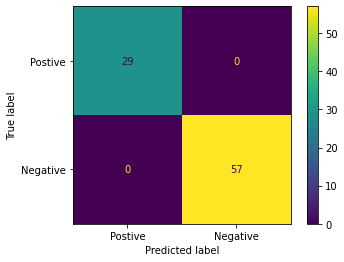

In [20]:
cmd_obj = ConfusionMatrixDisplay(cm,display_labels=['Postive','Negative'])
cmd_obj.plot()

# Plot Classification with one feature

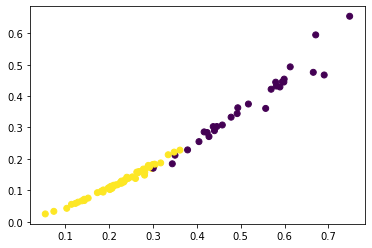

In [21]:
plt.scatter(X_test[:,3],X_test[:,4], c = y_test)

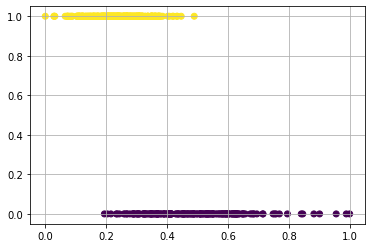

In [22]:
#plot train data on one of the features
plt.scatter(X_train[:,3],y_train, c = y_train)
plt.grid()

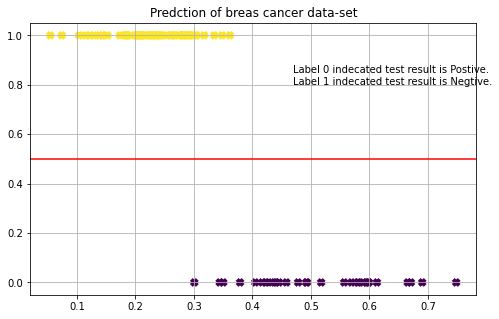

In [23]:
#plot classified data on one of the features
plt.figure(figsize=(8,5))

plt.scatter(X_test[:,3],y_pred, c = y_test, marker = 'x' , lw = 4)
plt.axhline(y = 0.5, c='r')
plt.title('Predction of breas cancer data-set')
plt.text(.47,.8,'Label 0 indecated test result is Postive.\nLabel 1 indecated test result is Negtive.',{'color':'black','size':10})


plt.grid()
plt.show()